*Sebastian Raschka*  
last modified: 03/31/2014

<hr>
I am really looking forward to your comments and suggestions to improve and extend this tutorial! Just send me a quick note   
via Twitter: [@rasbt](https://twitter.com/rasbt)  
or Email: [bluewoodtree@gmail.com](mailto:bluewoodtree@gmail.com)
<hr>

### Problem Category
- Statistical Pattern Recognition   
- Supervised Learning  
- Parametric Learning  
- Bayes Decision Theory  
- Univariate data  
- 2-class problem
- different variances
- Gaussian model (2 parameters)
- No Risk function
<hr>

<p><a name="sections"></a>
<br></p>

# Sections


<p>&#8226; <a href="#given">Given information</a><br>
&#8226; <a href="#deriving_db">Deriving the decision boundary</a><br>
&#8226; <a href="#plotting_db">Plotting the class conditional densities, posterior probabilities, and decision boundary</a><br>
&#8226; <a href="#classify_rand">Classifying some random example data</a><br>
&#8226; <a href="#emp_err">Calculating the empirical error rate</a><br>

  

  
  



<hr>

<p><a name="given"></a>
<br></p>

## Given information:

[<a href="#sections">back to top</a>] <br>



####model: continuous univariate normal (Gaussian) model for the class-conditional densities


$ p(x | \omega_j) \sim N(\mu|\sigma^2) $

$ p(x | \omega_j) \sim \frac{1}{\sqrt{2\pi\sigma^2}} \exp{ \bigg[-\frac{1}{2}\bigg( \frac{x-\mu}{\sigma}\bigg)^2 \bigg] } $


####Prior probabilities:


$ P(\omega_1) = P(\omega_2) = 0.5 $

#### Variances of the sample distributions

$ \sigma_1^2 = 4, \quad \sigma_2^2 = 1 $

#### Means of the sample distributions

$ \mu_1 = 4, \quad \mu_2 = 10 $


<br>

<p><a name="deriving_db"></a>
<br></p>

## Deriving the decision boundary
[<a href="#sections">back to top</a>] <br>
### Bayes' Rule:


$ P(\omega_j|x) = \frac{p(x|\omega_j) * P(\omega_j)}{p(x)} $


###Bayes' Decision Rule:

Decide $ \omega_1 $ if $ P(\omega_1|x) > P(\omega_2|x) $ else decide $ \omega_2 $.
<br>


\begin{equation}
\begin{aligned}
&\Rightarrow \frac{p(x|\omega_1) * P(\omega_1)}{p(x)} > \frac{p(x|\omega_2) * P(\omega_2)}{p(x)}
\end{aligned}
\end{equation} 

###Bayes' Decision Rule:

Decide $ \omega_1 $ if $ P(\omega_1|x) > P(\omega_2|x) $ else decide $ \omega_2 $.
<br>



$ \Rightarrow \frac{p(x|\omega_1) * P(\omega_1)}{p(x)} > \frac{p(x|\omega_2) * P(\omega_2)}{p(x)} $


We can drop $ p(x) $ since it is just a scale factor.

$ \Rightarrow P(x|\omega_1) * P(\omega_1) > p(x|\omega_2) * P(\omega_2) $

$ \Rightarrow \frac{p(x|\omega_1)}{p(x|\omega_2)} > \frac{P(\omega_2)}{P(\omega_1)} $

$ \Rightarrow \frac{p(x|\omega_1)}{p(x|\omega_2)} > \frac{0.5}{0.5} $

$ \Rightarrow \frac{p(x|\omega_1)}{p(x|\omega_2)} > 1 $

$ \Rightarrow \frac{1}{\sqrt{2\pi\sigma_1^2}} \exp{ \bigg[-\frac{1}{2}\bigg( \frac{x-\mu_1}{\sigma_1}\bigg)^2 \bigg] } > \frac{1}{\sqrt{2\pi\sigma_2^2}} \exp{ \bigg[-\frac{1}{2}\bigg( \frac{x-\mu_2}{\sigma_2}\bigg)^2 \bigg] } \quad \bigg| \quad ln $



$ \Rightarrow ln(1) - ln\bigg({\sqrt{2\pi\sigma_1^2}}\bigg) -\frac{1}{2}\bigg( \frac{x-\mu_1}{\sigma_1}\bigg)^2  > ln(1) - ln\bigg({{\sqrt{2\pi\sigma_2^2}}}\bigg) -\frac{1}{2}\bigg( \frac{x-\mu_2}{\sigma_2}\bigg)^2 \quad \bigg| \quad \sigma_1^2 = 4, \quad \sigma_2^2 = 1,\quad \mu_1 = 4, \quad \mu_2 = 10 $


$ \Rightarrow -ln({\sqrt{2\pi4}}) -\frac{1}{2}\bigg( \frac{x-4}{2}\bigg)^2  > -ln({{\sqrt{2\pi}}}) -\frac{1}{2}(x-10)^2 $

$ \Rightarrow -\frac{1}{2} ln({2\pi}) - ln(2) -\frac{1}{8} (x-4)^2  > -\frac{1}{2}ln(2\pi) -\frac{1}{2}(x-10)^2 \quad \bigg| \; \times\; 2 $

$ \Rightarrow -ln({2\pi}) - 2ln(2) - \frac{1}{4}(x-4)^2  > -ln(2\pi) - (x-10)^2 \quad \bigg| \; + ln(2\pi) $

$ \Rightarrow -4ln(4) - (x-4)^2  >- 4(x-10)^2 $

$ \Rightarrow -ln(4) - \frac{1}{4}(x-4)^2  > -(x-10)^2 \quad \big| \; \times \; 4 $

$ \Rightarrow -8ln(2) - x^2 + 8x - 16  > - 4x^2 + 80x - 400 $

$ \Rightarrow 3x^2 - 72x + 384 -8ln(2) > 0 $

$ \Rightarrow x < 7.775 \quad and \quad x > 16.225 $

<p><a name="plotting_db"></a>
<br></p>

## Plotting the class conditional densities, posterior probabilities, and decision boundary

[<a href="#sections">back to top</a>] <br>

Populating the interactive namespace from numpy and matplotlib


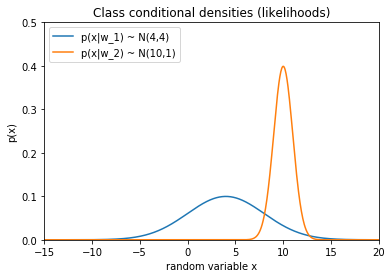

In [1]:
%pylab inline

import numpy as np
from matplotlib import pyplot as plt

def pdf(x, mu, sigma):
    """
    Calculates the normal distribution's probability density 
    function (PDF).  
        
    """
    term1 = 1.0 / ( math.sqrt(2*np.pi) * sigma )
    term2 = np.exp( -0.5 * ( (x-mu)/sigma )**2 )
    return term1 * term2

# generating some sample data
x = np.arange(-100, 100, 0.05)

# probability density functions
pdf1 = pdf(x, mu=4, sigma=4)
pdf2 = pdf(x, mu=10, sigma=1)

# Class conditional densities (likelihoods)
plt.plot(x, pdf1)
plt.plot(x, pdf2)
plt.title('Class conditional densities (likelihoods)')
plt.ylabel('p(x)')
plt.xlabel('random variable x')
plt.legend(['p(x|w_1) ~ N(4,4)', 'p(x|w_2) ~ N(10,1)'], loc='upper left')
plt.ylim([0,0.5])
plt.xlim([-15,20])
plt.show()

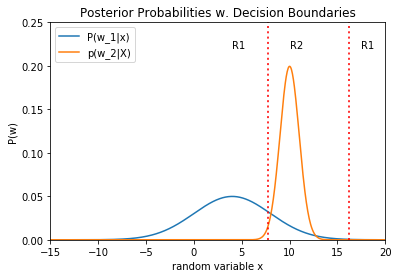

In [2]:
def posterior(likelihood, prior):
    """
    Calculates the posterior probability (after Bayes Rule) without
    the scale factor p(x) (=evidence).  
        
    """
    return likelihood * prior

# probability density functions
posterior1 = posterior(pdf(x, mu=4, sigma=4), 0.5)
posterior2 = posterior(pdf(x, mu=10, sigma=1), 0.5)

# Class conditional densities (likelihoods)
plt.plot(x, posterior1)
plt.plot(x, posterior2)
plt.title('Posterior Probabilities w. Decision Boundaries')
plt.ylabel('P(w)')
plt.xlabel('random variable x')
plt.legend(['P(w_1|x)', 'p(w_2|X)'], loc='upper left')
plt.ylim([0,0.25])
plt.xlim([-15,20])
plt.axvline(7.775, color='r', alpha=0.8, linestyle=':', linewidth=2)
plt.axvline(16.225, color='r', alpha=0.8, linestyle=':', linewidth=2)
plt.annotate('R2', xy=(10, 0.2), xytext=(10, 0.22))
plt.annotate('R1', xy=(4, 0.2), xytext=(4, 0.22))
plt.annotate('R1', xy=(17, 0.2), xytext=(17.5, 0.22))
plt.show()

<p><a name="classify_rand"></a>
<br></p>

## Classifying some random example data

[<a href="#sections">back to top</a>] <br>

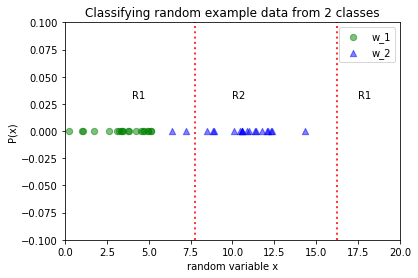

In [3]:
# Parameters
mu_1 = 4
mu_2 = 10
sigma_1_sqr = 4
sigma_2_sqr = 1

# Generating 10 random samples drawn from a Normal Distribution for class 1 & 2
x1_samples = sigma_1_sqr**0.5 * np.random.randn(20) + mu_1
x2_samples = sigma_1_sqr**0.5 * np.random.randn(20) + mu_2
y = [0 for i in range(20)]

# Plotting sample data with a decision boundary

plt.scatter(x1_samples, y, marker='o', color='green', s=40, alpha=0.5)
plt.scatter(x2_samples, y, marker='^', color='blue', s=40, alpha=0.5)
plt.title('Classifying random example data from 2 classes')
plt.ylabel('P(x)')
plt.xlabel('random variable x')
plt.legend(['w_1', 'w_2'], loc='upper right')
plt.ylim([-0.1,0.1])
plt.xlim([0,20])
plt.axvline(7.775, color='r', alpha=0.8, linestyle=':', linewidth=2)
plt.axvline(16.225, color='r', alpha=0.8, linestyle=':', linewidth=2)
plt.annotate('R2', xy=(10, 0.03), xytext=(10, 0.03))
plt.annotate('R1', xy=(4, 0.03), xytext=(4, 0.03))
plt.annotate('R1', xy=(17, 0.03), xytext=(17.5, 0.03))
plt.show()

<p><a name="emp_err"></a>
<br></p>

## Calculating the empirical error rate

[<a href="#sections">back to top</a>] <br>

In [4]:
w1_as_w2, w2_as_w1 = 0, 0
for x1,x2 in zip(x1_samples, x2_samples):
    if x1 > 7.775 and x1 < 16.225:
        w1_as_w2 += 1
    if x2 <= 7.775 and x2 >= 16.225:
        w2_as_w1 += 1
  
emp_err =  (w1_as_w2 + w2_as_w1) / float(len(x1_samples) + len(x2_samples))
    
print('Empirical Error: {}%'.format(emp_err * 100))

Empirical Error: 0.0%


In [ ]:
test complete; Gopal